In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../../')

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))
fm.findfont("serif", rebuild_if_missing=False)


import transformer_anatomy
from transformer_anatomy.utils import get_results

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


In [4]:
dir_path = '../../results/linear_head_wise_results'

pair_df = get_results(dir_path=dir_path, part='head', metrics=[])
pair_df = pair_df.loc[pair_df['model_name'] != 'transfo-xl-wt103']

# pair_df = pair_df.loc[pair_df['model_name'] == 'bert-base-uncased']

pair_df = pair_df.pivot_table(index=['model_name', 'layer', 'head'], columns='task', values='acc')
pair_df = pair_df.reset_index()


In [5]:
pair_df['surface'] = pair_df['WordContent'] + pair_df['Length']
pair_df['syntactic'] = (pair_df['Depth'] + pair_df['TopConstituents'] + pair_df['BigramShift']) / 3
pair_df['semantic'] = (pair_df['Tense'] + pair_df['SubjNumber'] + pair_df['ObjNumber'] + pair_df['OddManOut'] + pair_df['CoordinationInversion']) / 5


In [6]:
def draw_scatter(*args, **kwargs):
    data = kwargs.pop('data')

    sns.scatterplot(data[args[0]], data[args[1]], **kwargs)


In [7]:
model_name_list = ['BERT']

model_list = ['bert-base-uncased', 'bert-large-uncased', 'openai-gpt', 'gpt2', 'electra-small-discriminator', 'electra-base-discriminator', 'electra-large-discriminator']
g = sns.FacetGrid(pair_df, col="model_name",  hue="layer", col_order=model_list, col_wrap=2, palette=sns.color_palette("gist_rainbow", n_colors=24), aspect=1.3, height=2.5) #viridis
g.map(plt.scatter, "syntactic", "semantic", edgecolor="w", marker='+').add_legend().fig.subplots_adjust(wspace=.05, hspace=.2)
# g.map_dataframe(draw_scatter, 'syntactic', 'semantic', marker='+').add_legend().fig.subplots_adjust(wspace=.05, hspace=.2)
for i, ax in enumerate(g.axes.flat):
    ax.set_title(model_list[i])
g.savefig('test.pdf')

RuntimeError: Failed to process string with tex because latex could not be found

In [23]:
pair_df.loc[pair_df.model_name == 'bert-base-uncased', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'bert-large-uncased', 'layer'] = (pair_df['layer']+1) / 24.0 * 100
pair_df.loc[pair_df.model_name == 'openai-gpt', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'gpt2', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'electra-base-discriminator', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'electra-small-discriminator', 'layer'] = (pair_df['layer']+1) / 12.0 * 100
pair_df.loc[pair_df.model_name == 'electra-large-discriminator', 'layer'] = (pair_df['layer']+1) / 24.0 * 100
pair_df['layer'] = pair_df['layer'].astype(int)

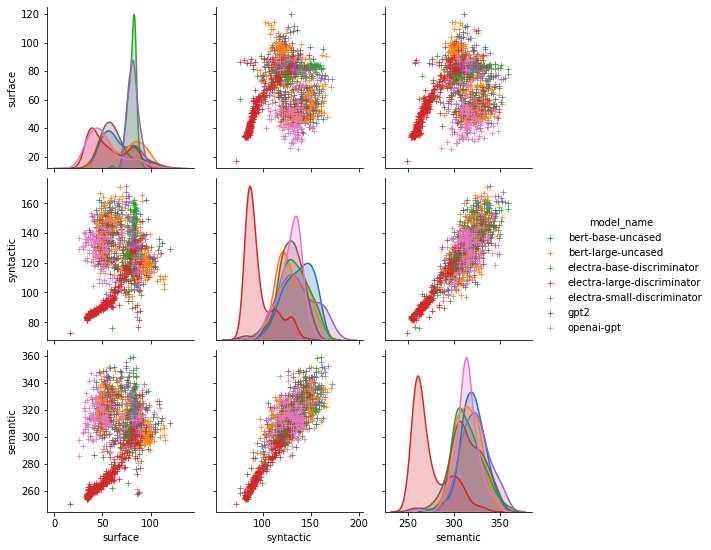

In [61]:
pair_df = pair_df.reset_index()
sns.pairplot(pair_df, hue='model_name', markers="+", vars=['surface', 'syntactic', 'semantic'])
